In [200]:

import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from lifelines import KaplanMeierFitter


from itertools import cycle


failure_data = pd.read_csv(r'Failure_modelling\Failure_Data\failure_data.csv', index_col=0)
pipe_data = pd.read_csv(r'Failure_modelling\Failure_Data\pipe_data.csv', index_col=0)

In [201]:
def side_by_side_bar(failure_col, pipe_col, title):
    failure_counts = failure_data[failure_col].value_counts(normalize=True)

    pipe_counts = pipe_data[pipe_col].value_counts(normalize=True)

    categories = sorted(set(failure_counts.index) | set(pipe_counts.index))

    failure_counts = failure_counts.reindex(categories, fill_value=0)
    pipe_counts = pipe_counts.reindex(categories, fill_value=0)

    width = 0.35 
    x = range(len(categories))  

    plt.bar(x, failure_counts, width, label='Failure Data')
    plt.bar([i + width for i in x], pipe_counts, width, label='Pipe Data')

    plt.xlabel(f'{title}')
    plt.ylabel('Relative amount')
    plt.title(f'Comparison of {title} Counts')
    plt.xticks([i + width/2 for i in x], categories, rotation='vertical')
    plt.legend()

    plt.tight_layout()
    plt.show()

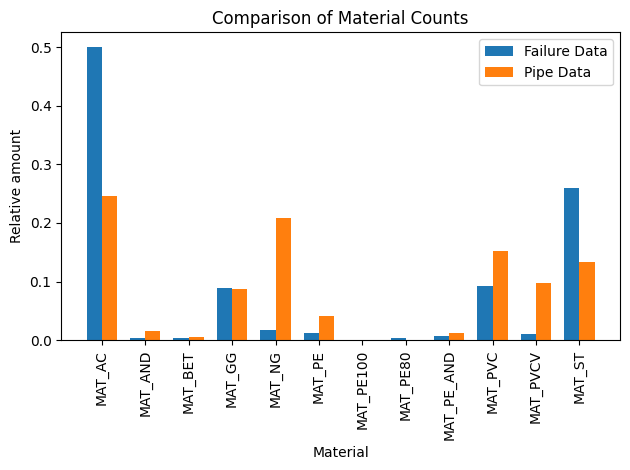

In [202]:
side_by_side_bar('storing_materiaal', 'Materiaalcode', 'Material')

In [203]:
# for i in [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:
#     failure_data_year = failure_data[pd.to_datetime(failure_data['storing_melddatum']).dt.year == i]
#     pipe_data_year = pipe_data[pd.to_datetime(pipe_data['Aanlegjaar']).dt.year <= i]
#     failures = failure_data_year['storing_diameter'].groupby(failure_data_year['storing_diameter']).count()
#     length = pipe_data_year['Lengte'].groupby(pipe_data_year['Diameter']).sum()
#     a = pd.DataFrame(failures.values / length[length.index.isin(failures.index.values)])
#     if not a.empty:
#         a.plot(kind='bar')
    

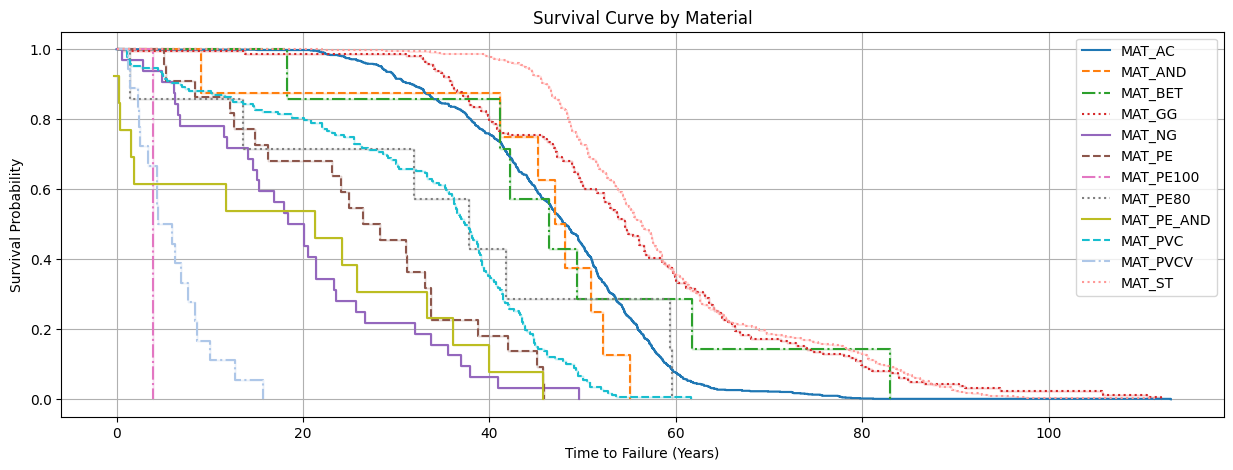

In [204]:
failure_data['Time_to_Failure'] = (pd.to_datetime(failure_data['storing_melddatum']) - pd.to_datetime(failure_data['storing_aanlegjaar'])).dt.days /365.25
kmf = KaplanMeierFitter()

# Define colors and line styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ff9896', '#ffbb78', '#98df8a', '#ff9896',
          '#9edae5', '#c5b0d5']
line_styles = ['-', '--', '-.', ':']

# Create a cycle iterator for both colors and line styles
color_cycle = cycle(colors)
line_style_cycle = cycle(line_styles)
plt.figure(figsize=(15,5))
for i, (material, group) in enumerate(failure_data.groupby('storing_materiaal')):
    kmf.fit(group['Time_to_Failure'], event_observed=(group['storing_melddatum'].notnull()), label=material, alpha=1)
    color = next(color_cycle)
    line_style = next(line_style_cycle)
    kmf.plot(color=color, linestyle=line_style, label=material)
plt.title('Survival Curve by Material')
plt.xlabel('Time to Failure (Years)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

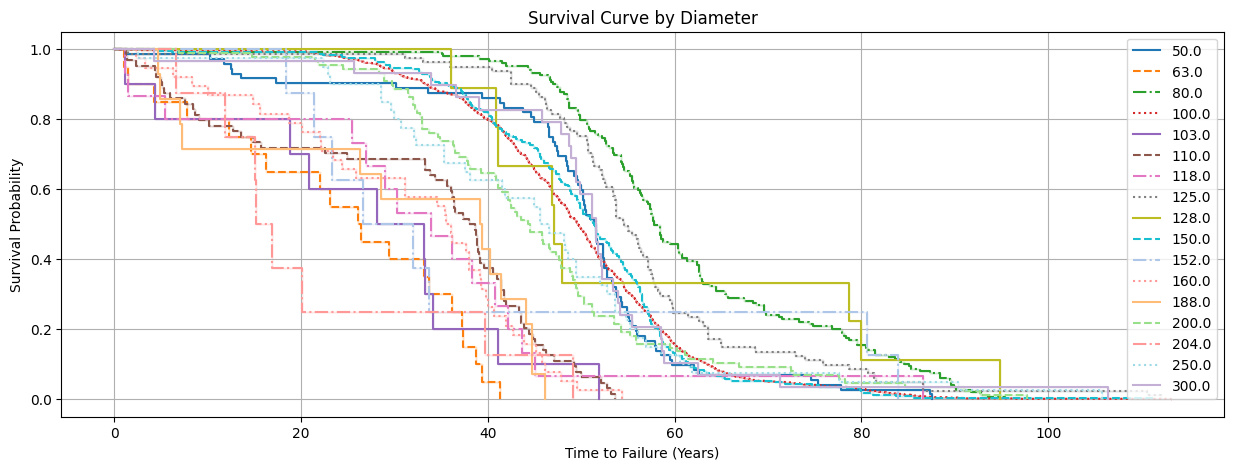

In [205]:
failure_data['Time_to_Failure'] = (pd.to_datetime(failure_data['storing_melddatum']) - pd.to_datetime(failure_data['storing_aanlegjaar'])).dt.days /365.25
failure_data_filtered = failure_data.groupby('storing_diameter').filter(lambda x: len(x) >= 8)
kmf = KaplanMeierFitter()


# Define colors and line styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ff9896', '#ffbb78', '#98df8a', '#ff9896',
          '#9edae5', '#c5b0d5']
line_styles = ['-', '--', '-.', ':']

# Create a cycle iterator for both colors and line styles
color_cycle = cycle(colors)
line_style_cycle = cycle(line_styles)

plt.figure(figsize=(15, 5))
for i, (material, group) in enumerate(failure_data_filtered.groupby('storing_diameter')):
    kmf.fit(group['Time_to_Failure'], event_observed=(group['storing_melddatum'].notnull()), label=material, alpha=1)
    color = next(color_cycle)
    line_style = next(line_style_cycle)
    kmf.plot(color=color, linestyle=line_style, label=material)

plt.title('Survival Curve by Diameter')
plt.xlabel('Time to Failure (Years)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

In [206]:
failure_data.keys()

Index(['index', 'Unnamed: 0', 'relatie_code', 'storing_idnummer',
       'storing_melddatum', 'storing_medium', 'storing_materiaal',
       'storing_type', 'storing_type_hulpstuk', 'storing_aanlegjaar',
       'storing_wanddikte', 'storing_diameter', 'storing_bomen',
       'storing_relining', 'storing_relining_jaar',
       'storing_kathodische_bescherming', 'storing_pmax',
       'storing_pdifference', 'storing_lengte_scheur', 'storing_grond_dekking',
       'storing_verkeersdrempels', 'storing_drempelafstand',
       'storing_verschijningsvorm', 'storing_bescherminginwendig',
       'storing_soortoorzaak', 'storing_oorzaak1spontanestoring',
       'storing_oorzaak2spontanestoring',
       'storing_oorzaakinternebedrijfsvoering', 'storing_storendobject',
       'Unnamed: 29', 'age_at_failure', 'construction_year_vs_graph_year',
       'Time_to_Failure'],
      dtype='object')

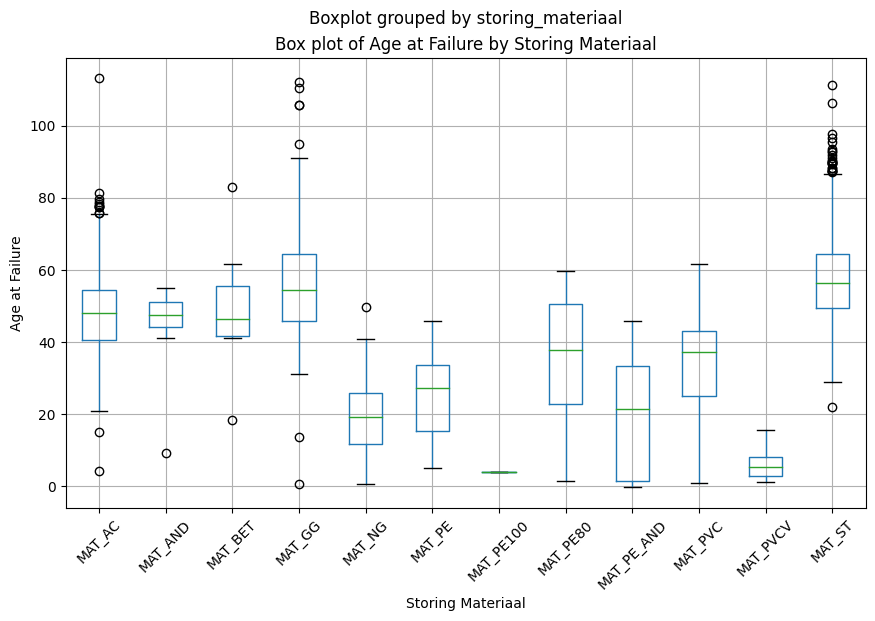

In [207]:
boxplot = failure_data.boxplot(column='age_at_failure', by='storing_materiaal', figsize=(10, 6))
plt.xlabel('Storing Materiaal')
plt.ylabel('Age at Failure')
plt.title('Box plot of Age at Failure by Storing Materiaal')

boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

plt.show()

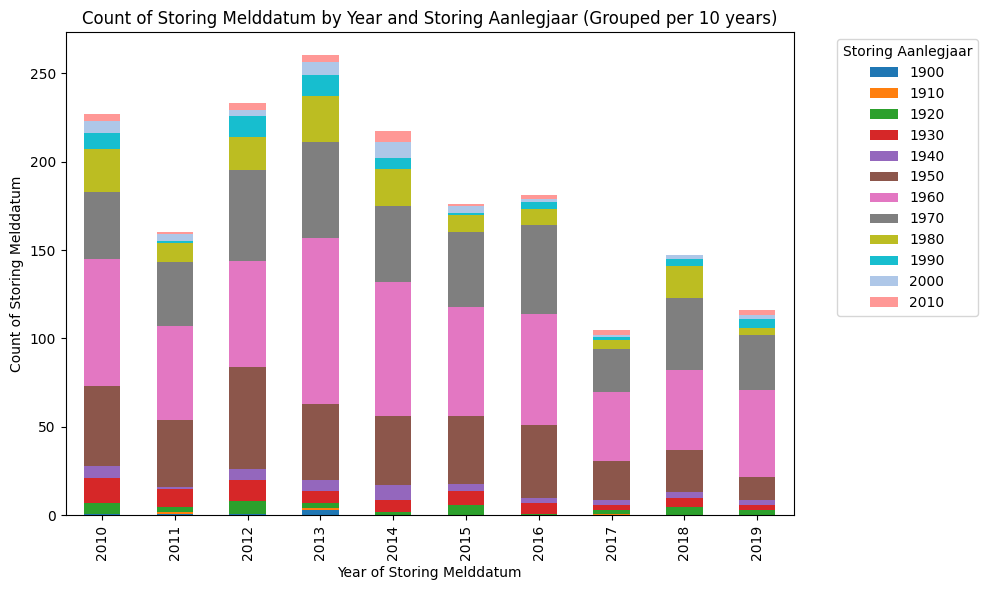

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming failure_data is your DataFrame
# Convert 'storing_melddatum' to datetime
failure_data['storing_melddatum'] = pd.to_datetime(failure_data['storing_melddatum'])

# Extract year from 'storing_melddatum'
failure_data['year'] = failure_data['storing_melddatum'].dt.year

# Group by 'year' and 'storing_aanlegjaar' and count the occurrences
grouped_data = failure_data.groupby(['year', 'storing_aanlegjaar']).size().unstack(fill_value=0)

# Group storing_aanlegjaar per 5 years
grouped_data_columns = pd.to_datetime(grouped_data.columns).year
grouped_data_columns = ((grouped_data_columns - grouped_data_columns.min()) // 10) * 10 + grouped_data_columns.min()
grouped_data = grouped_data.groupby(grouped_data_columns, axis=1).sum()

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ff9896']
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Year of Storing Melddatum')
plt.ylabel('Count of Storing Melddatum')
plt.title('Count of Storing Melddatum by Year and Storing Aanlegjaar (Grouped per 10 years)')
plt.legend(title='Storing Aanlegjaar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

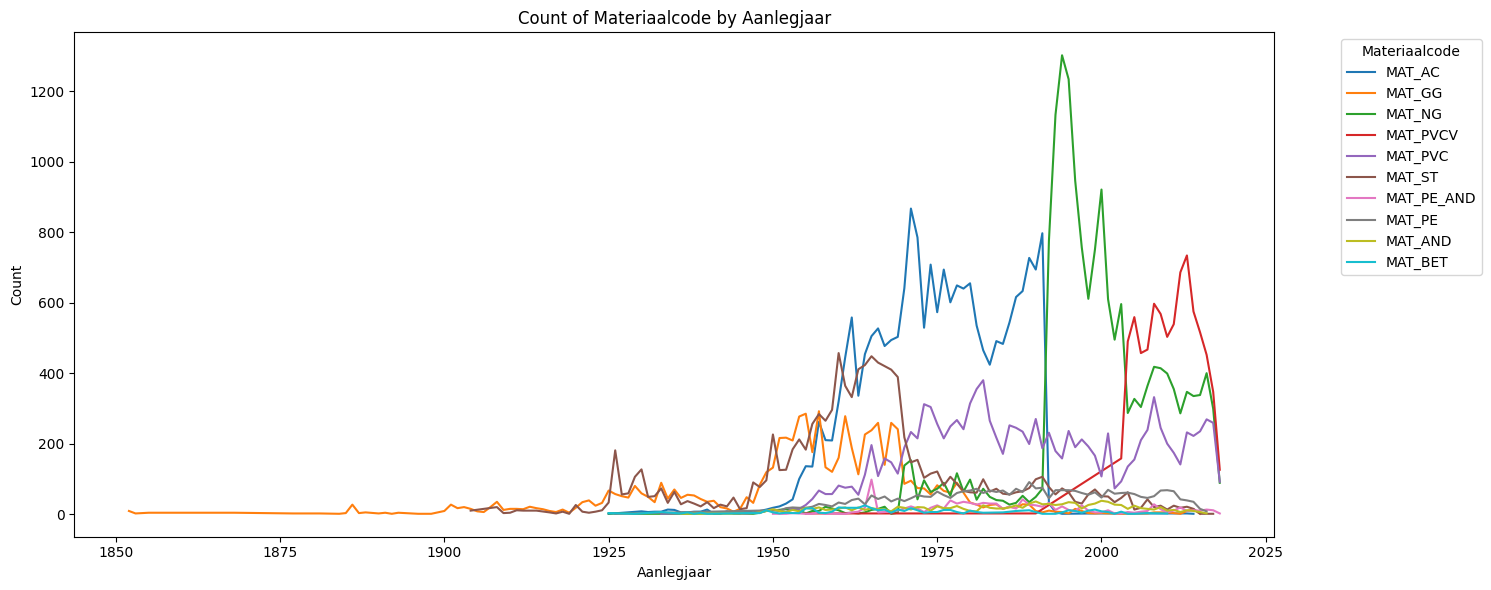

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pipe_data is your DataFrame
unique_materiaal = pipe_data['Materiaalcode'].unique().tolist()

plt.figure(figsize=(15, 6))

for materiaal in unique_materiaal:
    materiaal_data = pipe_data[pipe_data['Materiaalcode'] == materiaal].groupby('Aanlegjaar').count()
    plt.plot(materiaal_data.index, materiaal_data['Lengte'], label=materiaal) # Replace 'any_column_name' with any column name

plt.xlabel('Aanlegjaar')
plt.ylabel('Count')
plt.title('Count of Materiaalcode by Aanlegjaar')
plt.legend(title='Materiaalcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


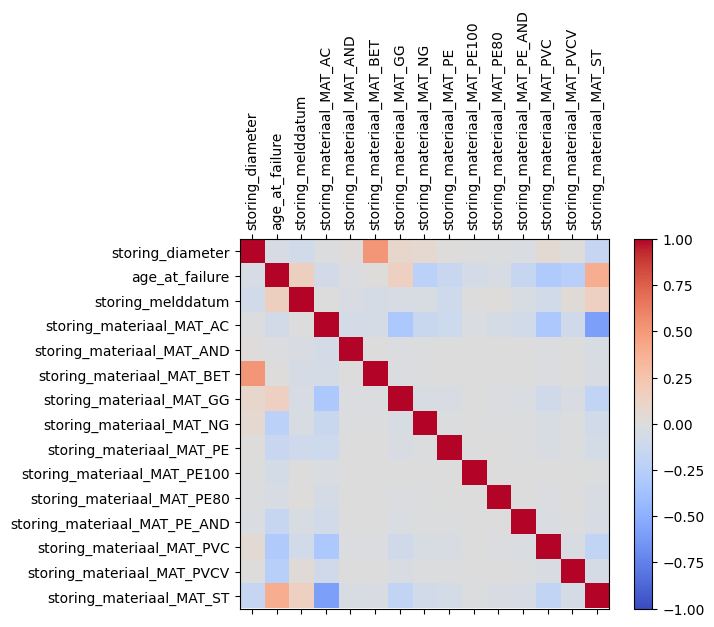

In [210]:
failure_data_selected = failure_data[['storing_diameter', 'storing_melddatum', 'storing_materiaal', 'age_at_failure']].copy()
numeric_columns = failure_data_selected.select_dtypes(include='number')

# 2. Encode non-numeric columns into dummy variables
non_numeric_columns = failure_data_selected.select_dtypes(exclude='number')
dummy_variables = pd.get_dummies(non_numeric_columns)

# 3. Concatenate numeric columns and dummy variables
combined_data = pd.concat([numeric_columns, dummy_variables], axis=1)

# 4. Calculate the correlation matrix
corr = combined_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(combined_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(combined_data.columns)
ax.set_yticklabels(combined_data.columns)
plt.show()